### ⚠️⚠️⚠️ UPDATE 1 SEPTEMBER 2021: THIS NOTEBOOK MAY NOT RUN PROPERLY, WE'RE IDENTIFYING THE PROBLEMS. PLEASE CHECK BACK LATER! THANK YOU ⚠️⚠️⚠️

# Makeup Transfer with CPM

This Colab demonstrates Makeup Transfer Application using **CPM** (Color-Pattern Makeup Transfer) model.

The model architecture is described in the paper "[Lipstick ain't enough: Beyond Color-Matching for In-the-Wild MakeUp Transfer](https://arxiv.org/abs/2104.01867)", in CVPR 2021.
Source code and datasets are publicly available on
[Github](github.com/VinAIResearch/CPM).

CPM is the a holistic makeup transfer model that can replicate **both colors and patterns** from a reference makeup style to another image.

In this Colab, we'll investigate each cases of transferring makeup:


*   Pattern + Color
*   Pattern Only
*   Color Only

**Please Create a COPY of this Notebook before you run the code**



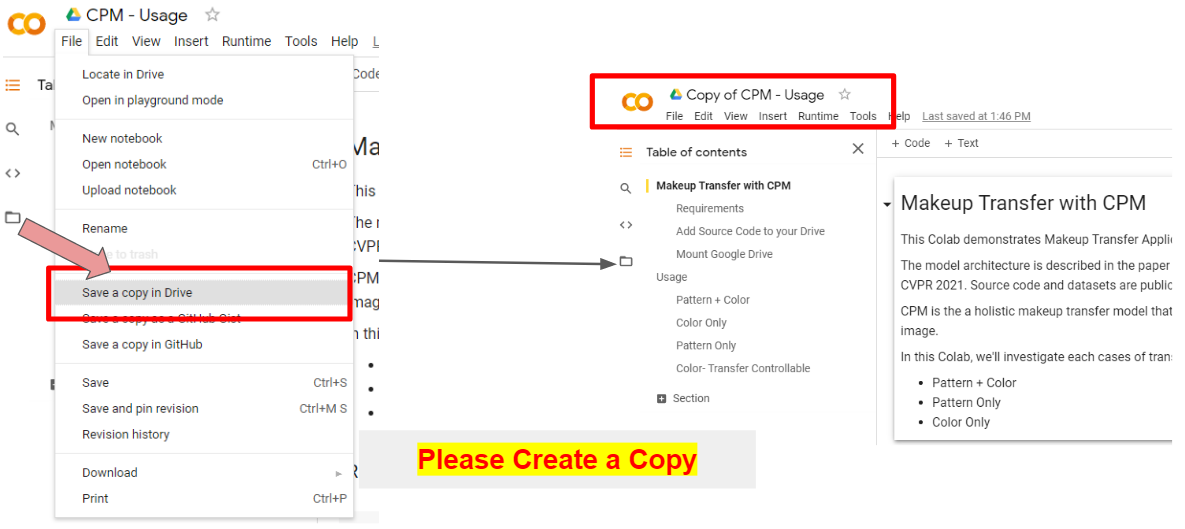

### Requirements

In [13]:
# Install required libraries. This takes about **4-5 mins**.
%%time
!pip install torch==1.11.0 torchvision==0.12.0
!pip uninstall tensorflow -y
!pip install tensorflow-gpu==2.8.0
!pip install blend_modes
!pip install segmentation-models-pytorch==0.1.3
!pip install --upgrade tf_slim
!pip install timm==0.4.12

  Using cached timm-0.4.12-py3-none-any.whl.metadata (30 kB)
Using cached timm-0.4.12-py3-none-any.whl (376 kB)
  Attempting uninstall: timm
    Found existing installation: timm 0.3.2
    Uninstalling timm-0.3.2:
      Successfully uninstalled timm-0.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segmentation-models-pytorch 0.1.3 requires timm==0.3.2, but you have timm 0.4.12 which is incompatible.
CPU times: user 150 ms, sys: 27.4 ms, total: 177 ms
Wall time: 18.4 s


### Add Source Code to your Drive

1. Open *CPM-Shared-Folder* in [this link](https://drive.google.com/drive/folders/1rZyAvaAtqZ9a0okVcv4OFaq9aiVvKg5Q?usp=sharing)
2. Add shortcut of *CPM-Shared-Folder* to your Drive.
3. Choose *My Drive*, then click ADD SHORTCUT.

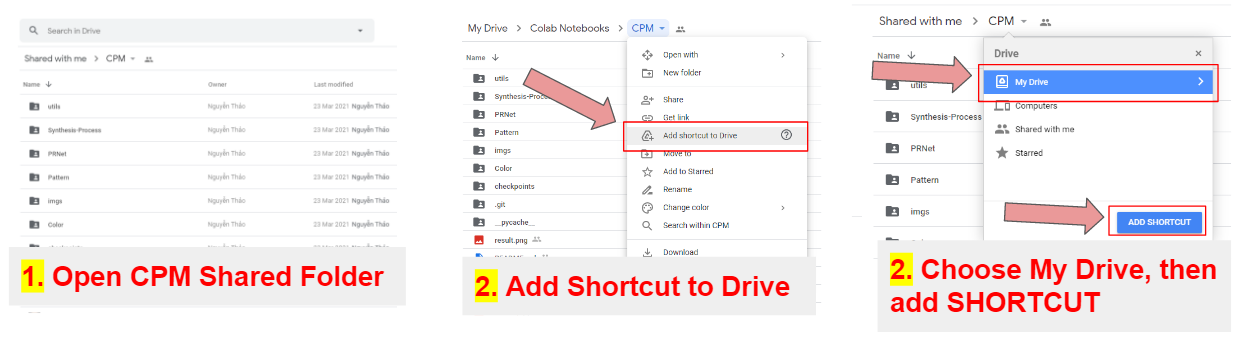

### Mount Google Drive

In [2]:
from google.colab import drive
import os

drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
path = os.path.join(root_dir, 'CPM')
print(path, os.listdir(path))

os.chdir(path)

Mounted at /content/gdrive
/content/gdrive/My Drive/CPM ['result.png', 'about-data.md', 'environment.yml', 'Dockerfile', 'parser.py', 'main.py', 'README.md', 'LICENSE', 'requirements.txt', '.gitignore', 'makeup_old.py', 'makeup.py', 'imgs', 'Color', 'PRNet', 'utils', 'Pattern', '__pycache__', 'checkpoints']


# Usage

Input:
- Original Image (Non-makeup) (left)
- Style (right)

We'll go though 3 type of makeup transfer:

- Pattern + Color
- Color Only
- Pattern Only

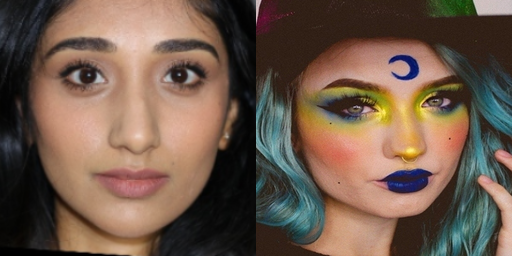

In [3]:
# Check input images
from PIL import Image
import numpy as np

original = np.array(Image.open('./imgs/non-makeup.png').resize((256, 256), Image.LANCZOS))
style = np.array(Image.open('./imgs/style-1.png').resize((256, 256), Image.LANCZOS))

Image.fromarray(np.concatenate([original, style], axis=1))

### Pattern + Color

In [14]:
# Pattern + Color: Image will be saved in 'result.png'
os.chdir(path)
!python -W ignore main.py --style ./imgs/style-1.png --input ./imgs/non-makeup.png

2024-09-19 06:51:14.118186: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2024-09-19 06:51:14.118234: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
           ⊱ ──────ஓ๑♡๑ஓ ────── ⊰
🎵 hhey, arguments are here if you need to check 🎵
checkpoint_pattern:      ./checkpoints/pattern.pth
checkpoint_color:        ./checkpoints/color.pth
         device:                           cuda
            prn:                           True
     color_only:                          False
   pattern_only:                          False
          input:          ./imgs/non-makeup.png
          style:             ./imgs/style-1.png
          alpha:                            0.5


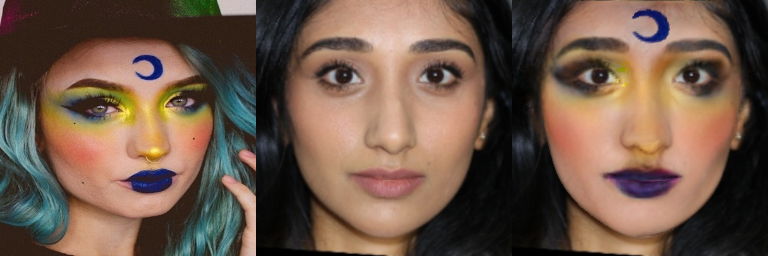

In [15]:
Image.open(os.path.join(path, 'result.png'))

### Color Only

In [16]:
# Color Only: Image will be saved in 'result.png'
os.chdir(path)
!python -W ignore main.py --style ./imgs/style-1.png --input ./imgs/non-makeup.png --color_only --alpha 0.8

2024-09-19 06:52:46.058227: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2024-09-19 06:52:46.058266: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
           ⊱ ──────ஓ๑♡๑ஓ ────── ⊰
🎵 hhey, arguments are here if you need to check 🎵
checkpoint_pattern:      ./checkpoints/pattern.pth
checkpoint_color:        ./checkpoints/color.pth
         device:                           cuda
            prn:                           True
     color_only:                           True
   pattern_only:                          False
          input:          ./imgs/non-makeup.png
          style:             ./imgs/style-1.png
          alpha:                            0.8


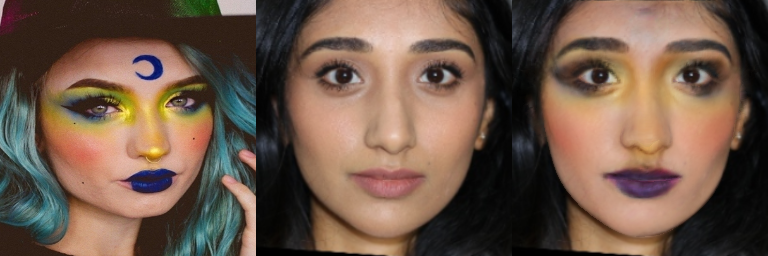

In [17]:
Image.open(os.path.join(path, 'result.png'))

### Pattern Only

In [18]:
# Pattern Only: Image will be saved in 'result.png'
os.chdir(path)
!python -W ignore main.py --style ./imgs/style-1.png --input ./imgs/non-makeup.png --pattern_only

2024-09-19 06:53:37.173737: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2024-09-19 06:53:37.173786: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
           ⊱ ──────ஓ๑♡๑ஓ ────── ⊰
🎵 hhey, arguments are here if you need to check 🎵
checkpoint_pattern:      ./checkpoints/pattern.pth
checkpoint_color:        ./checkpoints/color.pth
         device:                           cuda
            prn:                           True
     color_only:                          False
   pattern_only:                           True
          input:          ./imgs/non-makeup.png
          style:             ./imgs/style-1.png
          alpha:                            0.5


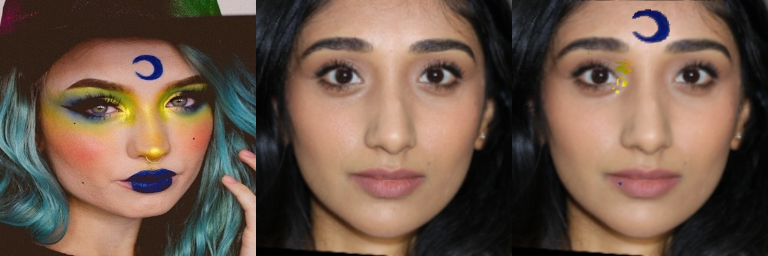

In [ ]:
Image.open(os.path.join(path, 'result.png'))

### Color- Transfer Controllable

You can control the obviousness of color-transfer by `alpha` (0-1)

In [ ]:
# Color Only: Degree: 0.7
os.chdir(path)
!python -W ignore main.py --style ./imgs/style-3.png --input ./imgs/non-makeup.png --color_only --alpha 0.7

2021-03-24 06:47:29.818925: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcudnn.so.7
Completed 👍 Please check result in: ./result.png


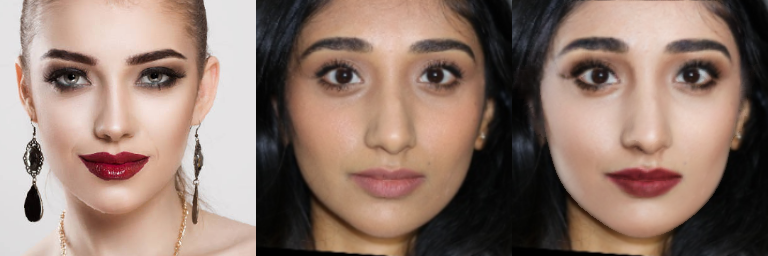

In [ ]:
Image.open(os.path.join(path, 'result.png'))

In [ ]:
# Color Only: Degree: 0.3
os.chdir(path)
!python -W ignore main.py --style ./imgs/style-3.png --input ./imgs/non-makeup.png --color_only --alpha 0.3

Completed 👍 Please check result in: ./result.png


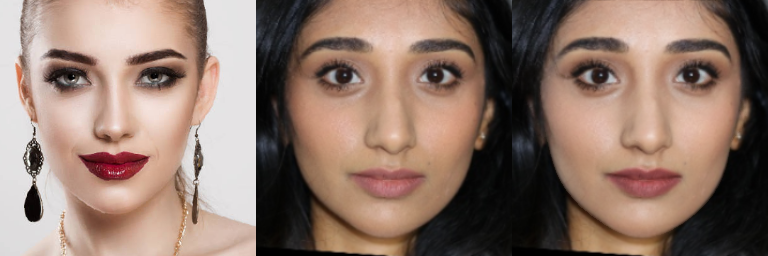

In [ ]:
Image.open(os.path.join(path, 'result.png'))

**The End**